# Ejemplo diseño filtro de Chebyshev

## Requisitos de plantilla

Diseñe un filtro que cumpla con la siguiente plantilla:

|  $\alpha$               |  $f$  |
|-------------------------|-------|
|  $\alpha_{max}$ = 1dB   | 1KHz  |
|  $\alpha_{min}$ = 40dB  | 4KHz  |

Dicho circuito debe ser sintetizado utilizando las funciones aproximantes de Chebyshev.

## Cálculo de $\epsilon$ y $N$

Al tener los valores de plantilla del filtro, lo primero que debemos calcular son los parámetros del filtro de Chebyshev, $\epsilon$ y $N$. Para ello, partimos de la expresión del filtro en $w$:

$|H_{(jw)}|^2 = \frac{1}{1 + \epsilon^2 C^{(n, N)}}$

$|H_{(jw)}| = \frac{1}{\sqrt{1 + \epsilon^2 cosh^2 (N acosh(w))}}$

Donde $w$ es una variable normalizada, es decir, los valores de frecuencia provistos en la plantilla deben ser normalizados. Así, podemos obtener la siguiente plantilla:


|  $\alpha$               |  $w$  |
|-------------------------|-------|
|  $\alpha_{max}$ = 1dB   | 1     |
|  $\alpha_{min}$ = 40dB  | 4     |

Tras haber aplicado una norma de frecuencia $N_{\Omega_1} = 2 \pi 1KHz$.

In [2]:
import math as m

alpha_max = 1    # dB
alpha_min = 40   # dB
w_p = 1
w_s = 4
N_omega_1 = 2 * m.pi * 1e3

Entonces, a partir de la expresión de la transferencia de la cual conocemos dos valores de $w$ y dos valores del módulo de la atenuación, vamos a despejar los parámetros del filtro. Comencemos por $w_{p} = 1$:

$\alpha_{max} = 20 log(\sqrt{1 + \epsilon^2 C^2 (N, w_p)}) \to C^2 (N, 1) = 1$

$\alpha_{max} = 10 log(1 + \epsilon^2)$

$ \frac{\alpha_{max}}{10} = log(1 + \epsilon^2)$

$ 10^{0.1\alpha_{max}} = 1 + \epsilon^2$

$ \epsilon = \sqrt{10^{0.1\alpha_{max}} - 1} $

In [4]:
epsilon = m.sqrt(m.pow(10, 0.1 * alpha_max) - 1)
epsilon

0.5088471399095875

Proseguimos con el cálculo de $N$. De forma similar, utilizaremos la misma expresión pero evaluada en $w_s = 4$. Resulta:

$\alpha_{min} = 20 log(\sqrt{1 + \epsilon^2 C^2 (N, w_s)})$

$\alpha_{min} = 10 log(1 + \epsilon^2 cosh^2 (N acosh( w_s )))$

$ \frac{\alpha_{min}}{10} = log(1 + \epsilon^2 cosh^2 (N acosh( w_s )))$

$ 10^{0.1\alpha_{min}} = 1 + \epsilon^2 cosh^2 (N acosh( w_s ))$ 

$ 10^{0.1\alpha_{min}} - 1 = \epsilon^2 cosh^2 (N acosh( w_s ))$ 

$ \frac{10^{0.1\alpha_{min}} - 1}{\epsilon^2} = cosh^2 (N acosh( w_s ))$

$ \frac{10^{0.1\alpha_{min}} - 1}{10^{0.1\alpha_{max}} - 1} = cosh^2 (N acosh( w_s ))$ 

$ \sqrt{\frac{10^{0.1\alpha_{min}} - 1}{10^{0.1\alpha_{max}} - 1}} = cosh(N acosh( w_s ))$

$ acosh \left( \sqrt{\frac{10^{0.1\alpha_{min}} - 1}{10^{0.1\alpha_{max}} - 1}} \right ) = N acosh( w_s )$

$ N = \frac{acosh \left( \sqrt{\frac{10^{0.1\alpha_{min}} - 1}{10^{0.1\alpha_{max}} - 1}} \right )}{acosh( w_s )} $


In [5]:
N = m.acosh(m.sqrt((m.pow(10, alpha_min * 0.1) - 1) / (m.pow(10, alpha_max * 0.1) - 1))) / m.acosh(w_s)
N

2.8951057448310378

Como el orden de un filtro es un número entero, debemos redondear al entero superior el valor de N:

In [4]:
N = m.ceil(N)
N

3

## Cálculo de los coeficientes del polinomio del filtro

Dado que tenemos un filtro Chebyshev, existen dos formas de poder calcular las raíces del denominador. Para ello, podemos seguir el método propuesto en la sección 7.3 de Design of Analog Filters, o bien trabajar con parte de función ya que propone un método alternativo más general. Tomaremos el segundo camino.

Las funciones armónicas de Chebyshev pueden ser expresadas por equivantes polinómicos que siguen una forma recursiva de serie:

$C(N,w) = 2 w C(N-1,w) - C(N-2, w)$ con $C(0,w) = 1$ y $C(1,w) = w$.

Así:

- $N = 2$: $C(2, w) = 2 w^2 - 1 $
- $N = 3$: $C(3, w) = 2 w (2 w^2 - 1) - w = 4w^3 - 2w - w = 4w^3 - 3w$

Dado el módulo cuadrado de la transferencia en $w$, podemos expresarlo en $s$ sabiendo que $s = jw$:

$|H_{(jw)}|^2 = H_{(jw)} H^*_{(jw)} = H_{(s)} H_{(-s)} |s=jw$

$|H_{(w)}|^2 = \frac{1}{1 + \epsilon^2 (4w^3 - 3w)^2} = H_{(s)} H_{(-s)} |s=jw$

$|H_{(w)}|^2 = \frac{1}{1 + 16 \epsilon^2 w^6 - 24 \epsilon^2 w^4 + 9 \epsilon^2 w^2} $

$H_{(s)} H_{(-s)} |s=jw = \frac{1}{1 - 16 \epsilon^2 s^6 - 24 \epsilon^2 s^4 - 9 \epsilon^2 s^2} $

Además, sabemos que $2 N = 6$, o sea, que $H_{(s)}$ tiene un denominador cuyo polinomio es de grado 3, y $H_{(-s)}$ también. 

$H_{(s)} H_{(-s)} = \frac{1}{(s^3+ as^2 + bs + c)(-s^3+ as^2 - bs + c)}$

Note que los términos impares del segundo paréntesis son negativos, esto es producto de ser la representación de $H_{(-s)}$.

Podemos así trabajar el denominador para llegar a un expresión como la siguiente:

$\frac{1}{1 - 16 \epsilon^2 s^6 - 24 \epsilon^2 s^4 - 9 \epsilon^2 s^2} = \frac{1}{-s^6 + (a - a)s^5 + (a^2 - 2b)s^4 + (c - ab + ab - c)s^3 + (2ac - b^2)s^2 + (bc - bc)s + c^2}$

$\frac{\frac{1}{16\epsilon^2}}{\frac{1}{16 \epsilon^2} - s^6 - \frac{3}{2} s^4 - \frac{9}{16} s^2} = \frac{1}{-s^6 + 0 s^5 + (a^2 - 2b)s^4 + 0s^3 + (2ac - b^2)s^2 + 0s + c^2}$

Podemos entonces igualar término a término de la expresión:

| Coeficientes por grado     |                        |
|----------------------------|------------------------|
| $\frac{1}{16\epsilon^2}$   | $c^2$                  |
| $0 s$                      | $0 s$                  |
| $-\frac{9}{16} s^2$        | $(2ac - b^2)s^2$       |
| $0 s^3$                    | $0 s^3$                |
| $-\frac{3}{2} s^4$         | $(a^2 - 2b)s^4$        |
| $0 s^5$                    | $0 s^5$                |
| $- s^6$                    | $-s^6$                 |

Así, podemos distinguir las siguientes ecuaciones:

$\frac{1}{16\epsilon^2} = c^2$

$-\frac{9}{16} = 2ac - b^2$

$-\frac{3}{2} = a^2 - 2b$

Resolviendo:

- $a = 0,9883$
- $b = 1,2384$
- $c = 0,4913$

Lo que resulta:

$H_{(s)} = \frac{0,4913}{s^3 + 0,9883 s^2 + 1,2384 s + 0,4913}$


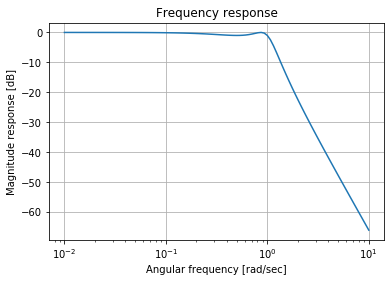

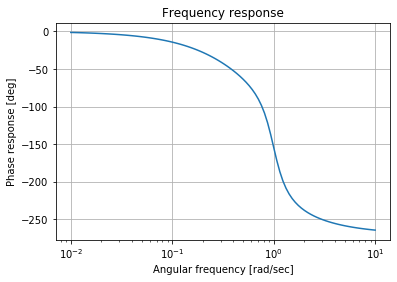

In [10]:
import scipy.signal as signal
import splane

num = [0.4913]
den = [1, 0.9883, 1.2384, 0.4913]
filtro = signal.TransferFunction(num, den)

splane.bodePlot(filtro)

## Cálculo y visualización de los polos

Factorizamos el denominador y obtenemos las siguientes raíces:

$s_1 = -0,4942$

$s_{23} = -0,2471 \pm j 0,9660$

Existen varios métodos para hacer esto, podemos destacar:

- Regla de Ruffini
- Newton Raphson

Y muchos otros más. En Python:

In [6]:
import numpy as np

raices = np.roots(den)
raices

array([-0.24707084+0.96600817j, -0.24707084-0.96600817j,
       -0.49415832+0.j        ])

Grafiquemos los polos para ver su ubicación en el plano $s$:

0 zeros: []
3 poles: [-0.24707084+0.96600817j -0.24707084-0.96600817j -0.49415832+0.j        ]
gain: 0.4913


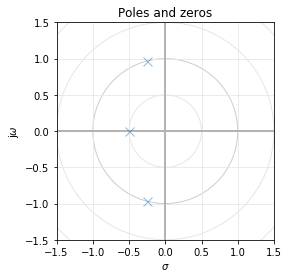

In [7]:
splane.pzmap(filtro)

## Síntesis del filtro con bloques pasivos buffereados

El siguiente paso consta de la síntesis del filtro. Este proceso lo vamos a dividir en dos:

- Síntesis del circuito normalizado
- Desnormalización de componentes

Esto es bastante conveniente, ya que el trabajo con los valores de los componentes y los coeficientes es mucho más simple hacerlo de forma normalizada.

### Síntesis del circuito normalizado

En este caso, optamos por una topología en cascada pasiva. Podemos dividir la función transferencia en estructuras de primero o segundo orden en cascada. Al tener polos complejos conjugados, dichos pares de polos no pueden ser separados en polos simples con componente imaginaria.

Así, utilizaremos bloques circuitales con transferencia conocida, como ser:

<img src="ejemplo_diseno_maxima_planicidad/segundo_orden.png"> 
<img src="ejemplo_diseno_maxima_planicidad/primer_orden.png">

Cuando el filtro tenga orden superior a dos, utilizaremos amplificadores operacionales para adaptar impedancias entre estructuras (recordar que el amplificador operacional tiene impedancia de entrada infinita y de salida nula).

Entonces, analicemos la estructura de segundo orden. La transferencia de la misma queda como ejercicio para el alumno, deberían llegar a la siguiente expresión:

$T_{(s)} = \frac{\frac{1}{LC}}{s^2 + \frac{s}{RC} + \frac{1}{LC}}$

Por igualación entre las expresiones:

$T_{1_{(s)}} = \frac{K w^2_0}{s^2 + \frac{w_0}{Q}s + w^2_0} = \frac{0.9942}{s^2 + 0.4941 s + 0.9942}$

Obtenemos:

$w^2_0 = \frac{1}{LC}$

$\frac{w_0}{Q} = \frac{1}{RC}$

$K w^2_0 = \frac{1}{LC} $

Así, vemos que la ganancia $K$ de nuestro circuito es $1$, una limitación de nuestra estructura. Trabajando con las expresiones anteriores:

$w_0 = \frac{1}{\sqrt{LC}}$

$Q = R C w_0$

Al tener dos restricciones y tres grados de libertad, debemos agregar una nueva restricción para poder definir los valores de los parámetros del circuito. Proponemos entonces asignarle de forma arbitraria el valor al capacitor *(elemento común en ambos parámetros $w_0$ y $Q$)* tal que:

$C = 1$

Así:

$L = \frac{1}{0.9942} = 1.0058$

$R = \frac{1}{0.4941} \to R = 2.0238$

Terminamos con el circuito pasa bajos. En este caso, la transferencia será:

$T_{2_{(s)}} = \frac{\frac{1}{RC}}{s + \frac{1}{RC}} $

Que debe ser equivalente a:

$T_{2_{(s)}} = \frac{1}{s + 1} $

Nuevamente, las equivalencias son:

$\frac{1}{RC} = 1$

Mantendremos el mismo valor de capacitor:

$C = 1$

$R = \frac{1}{0.4942} = 2,0235$

Finalmente el circuito resulta:

<img src="ejemplo_diseno_chebyshev/normalizado.png"> 

### Desnormalización de componentes

El proceso de síntesis de la función transferencia requirió dos normas de frecuencia, que a continuación unificamos en una:

$N_{\Omega} = N_{\Omega_{1}} $

In [8]:
N_omega = N_omega_1
N_omega

6283.185307179586

Así, convertiremos en frecuencia todos los componentes según las expresiones ya vistas.

In [9]:
# Componentes del circuito de segundo orden normalizado
C_1_n = 1
L_1_n = 1.0058
R_1_n = 2.0238

# Componentes del segundo orden desnormalizado:
C_1 = C_1_n / N_omega
L_1 = L_1_n / N_omega
R_1 = R_1_n

print('C_1: {}; L_1: {}; R_1: {}'.format(C_1, L_1, R_1))

# Componentes del circuito de primer orden normalizado
C_2_n = 1
R_2_n = 2.0235

# Componentes del segundo orden desnormalizado:
C_2 = C_2_n / N_omega
R_2 = R_2_n

print('C_2: {}, R_2: {}'.format(C_2, R_2))

C_1: 0.00015915494309189535; L_1: 0.00016007804176182834; R_1: 2.0238
C_2: 0.00015915494309189535, R_2: 2.0235


Resultando en el siguiente [circuito.asc](./ejemplo_diseno_chebyshev/circuito.asc):

<img src="./ejemplo_diseno_chebyshev/desnormalizado.png">

<img src="./ejemplo_diseno_chebyshev/respuesta_en_frecuencia.png">